# analyse_data_slp25_var

Analyses the thermal data as a function of flowrate from the 25 um polyimide chip that is being used in the LMVP chip. In particular, we plot the flow profile and the thermal resistances as a function of flow rate. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 3
from h5py import File

# Find out current working directory and label sub-directories
import os
cwd = os.getcwd()
print('cwd: ', cwd)

fig_dir = os.path.dirname(cwd) + '/figures/'
data_dir = os.path.dirname(cwd) + '/data/'
config_dir = os.path.dirname(cwd) + '/config/'
src_dir = os.path.dirname(os.path.dirname(os.path.dirname(cwd))) + '/src/'

os.chdir(src_dir)
from slp25_var import model
os.chdir(cwd)

# this is a kludge, params copied and pasted from the simulator file but it is convenient
params = {
    'freq':0,
    'neu_top':True,
    'wet':True,
    'vias':True,
    'power':10,
    'v_max':1e-1,
    'heater_metal':True
         }

save_file = True
save_name = 'analysis'

# load the model - this is used to run the sim and not strictly necessary for the analysis
k_in,c_in,rho_in,Q_in,v_in,x,y,dx,dy,nx,ny,n_bound = model(wet = params['wet'], vias = params['vias'], power = params['power'], 
                                                   heater_metal = params['heater_metal'], v_max = params['v_max'])
 

cwd:  /Users/andrewferguson/Documents/Andrew/MC Micron Cubed/PR Projects/05_thermal_simulations/runs/PI_1_site_flow/scripts


In [3]:
# A bit of manual work needed
filenames = ['single_heater_freq_0_neu_top_True_wet_True_vias_True_power_10_v_max_0_heater_metal_True.hdf5',
            'single_heater_freq_0_neu_top_True_wet_True_vias_True_power_10_v_max_0.0001_heater_metal_True.hdf5',
            'single_heater_freq_0_neu_top_True_wet_True_vias_True_power_10_v_max_0.001_heater_metal_True.hdf5',
            'single_heater_freq_0_neu_top_True_wet_True_vias_True_power_10_v_max_0.01_heater_metal_True.hdf5',
            'single_heater_freq_0_neu_top_True_wet_True_vias_True_power_10_v_max_0.1_heater_metal_True.hdf5']

labels = ['0 mm/s', '0.1 mm/s', '1 mm/s', '10 mm/s', '100 mm/s']

In [4]:
# Load the files and extract thermal resistances, temperatures and velocities
thermal_resistances = []
temperature_fields = []
v_maxs  = []

for filename in filenames:
    f = File(data_dir + filename)
    v_maxs.append(f.attrs['v_max'])
    thermal_resistances.append(f.attrs['simulated thermal resistance'])
    temperature_fields.append(f['T'][...])

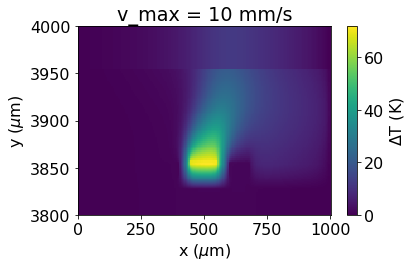

In [8]:
# Make arrays for flat plotting and plot
y_flat = np.array([sum(dy[:i]) for i in range(len(dy)+1)])
x_flat = np.array([i*dx for i in range(nx+1)])

fig, ax = plt.subplots(1,1,figsize = [6,4])
myplot = ax.pcolor(x_flat*1e6,y_flat*1e6,temperature_fields[3].real.T, shading = 'flat' )

ax.set_xlabel('x ($\mu$m)')
ax.set_ylabel('y ($\mu$m)')
cbar = fig.colorbar(myplot)
cbar.set_label('$\Delta$T (K)')
ax.set_ylim([3800,4000])
ax.set_title('v_max = {}'.format(labels[3]))
fig.tight_layout()

if save_file==True:
    fig.savefig(fig_dir + save_name+'_T_map.png',dpi=150,facecolor = 'w')

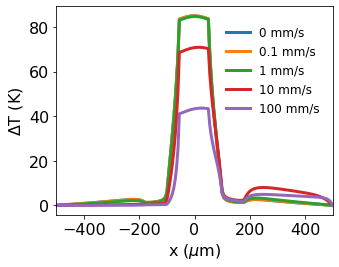

In [6]:
# Plot the sections

fig,ax=plt.subplots(1,1,figsize=[5,4])

for i in range(len(filenames)):
    ax.plot(x*1e6,temperature_fields[i].real.T[79,:],label = labels[i])
ax.set_xlabel('x ($\mu$m)')
ax.set_ylabel('$\Delta$T (K)')
ax.set_xlim(x.min()*1e6,x.max()*1e6)
fig.tight_layout()
fig.legend(frameon = False, loc = [0.65,0.55], fontsize = 12)

if save_file==True:
    fig.savefig(fig_dir + save_name+'_slices.png',dpi=150,facecolor = 'w')

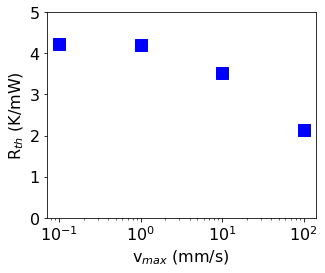

In [7]:
# Plot the thermal resistances

fig,ax=plt.subplots(1,1,figsize=[5,4])

ax.semilogx(np.array(v_maxs)*1e3,thermal_resistances,'s',markersize = 12,color = 'blue')
ax.set_xlabel('v$_{max}$ (mm/s)')
ax.set_ylabel('R$_{th}$ (K/mW)')
#ax.set_xlim(x.min()*1e6,x.max()*1e6)
fig.tight_layout()
#fig.legend(frameon = False, loc = [0.65,0.55], fontsize = 12)
ax.set_ylim([0,5])
if save_file==True:
    fig.savefig(fig_dir + save_name+'_resistances.png',dpi=150,facecolor = 'w')